<h1>Istrazivacka analiza podataka</h1>

In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('C:\\Users\\Nikola\\Python projects\\ML\\Project 2\\google_review_ratings.csv')
df.head()
df.columns = ['user', 
'churches',
'resorts',
'beaches',
'parks',
'theatres',
'museums',
'malls',
'zoo',
'restaurants',
'pubs/bars',
'local services',
'burger/pizza shops',
'hotels/other lodgings',
'juice bars',
'art galleries',
'dance clubs',
'swimming pools',
'gyms',
'bakeries',
'beauty & spas',
'cafes',
'view points',
'monuments',
'gardens',
'unnamed']
df = df.set_index('user')
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,unnamed
user,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [39]:
df.shape

(5456, 25)

In [40]:
df.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs/bars', 'local services',
       'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
       'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
       'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens',
       'unnamed'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

In [45]:
df.drop(["unnamed"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

In [47]:
df['local services'].head()

user
User 1     1.7
User 2     1.7
User 3     1.7
User 4    1.73
User 5     1.7
Name: local services, dtype: object

In [49]:
df["local services"] = pd.to_numeric(df["local services"], errors= 'coerce')
df['local services']

user
User 1       1.70
User 2       1.70
User 3       1.70
User 4       1.73
User 5       1.70
             ... 
User 5452    1.02
User 5453    1.01
User 5454    0.99
User 5455    0.97
User 5456    0.95
Name: local services, Length: 5456, dtype: float64

In [52]:
# RAZMISLI
df.describe().T

,count,mean,std,min,25%,50%,75%,max
churches,5456.0,1.455720,0.827604,0.00,0.92,1.340,1.8100,5.0
resorts,5456.0,2.319707,1.421438,0.00,1.36,1.905,2.6825,5.0
beaches,5456.0,2.489331,1.247815,0.00,1.54,2.060,2.7400,5.0
parks,5456.0,2.796886,1.309159,0.83,1.73,2.460,4.0925,5.0
theatres,5456.0,2.958941,1.339056,1.12,1.77,2.670,4.3125,5.0
museums,5456.0,2.893490,1.282400,1.11,1.79,2.680,3.8400,5.0
malls,5456.0,3.351395,1.413492,1.12,1.93,3.230,5.0000,5.0
zoo,5456.0,2.540795,1.111391,0.86,1.62,2.170,3.1900,5.0
restaurants,5456.0,3.126019,1.356802,0.84,1.80,2.800,5.0000,5.0
pubs/bars,5456.0,2.832729,1.307665,0.81,1.64,2.680,3.5300,5.0


<h1>Preprocesiranje podataka</h1>

In [53]:
df.isna().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           1
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

In [55]:
df['local services'].fillna(df['local services'].mean(),inplace=True)
df['burger/pizza shops'].fillna(df['burger/pizza shops'].mean(),inplace=True)
df['gardens'].fillna(df['gardens'].mean(),inplace=True)

In [56]:
df.isna().sum().sum()

0

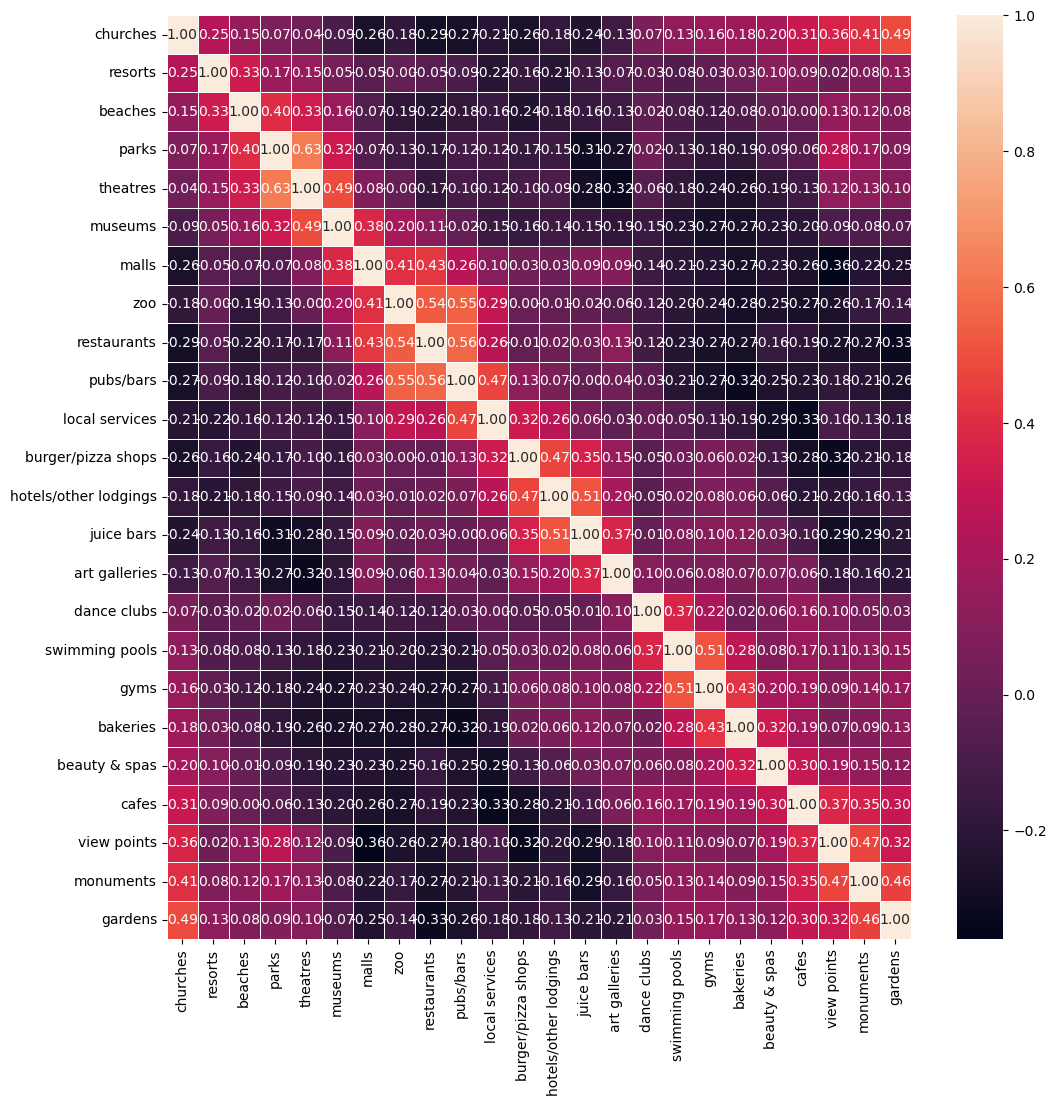

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f")
plt.show()


In [65]:
df[df.duplicated()]

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
user,,,,,,,,,,,,,,,,,,,,,
User 5,0.00,0.0,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.50,0.0,0.0,0.00,0.00,0.00
User 675,0.00,0.0,1.45,1.43,1.42,1.43,1.48,1.48,2.72,2.73,...,5.00,0.81,0.8,5.0,0.92,0.0,0.0,0.00,0.00,0.00
User 1347,1.06,1.1,5.00,3.28,5.00,5.00,5.00,1.84,1.81,5.00,...,1.77,1.80,0.0,0.0,0.00,0.0,0.0,1.05,1.03,1.04


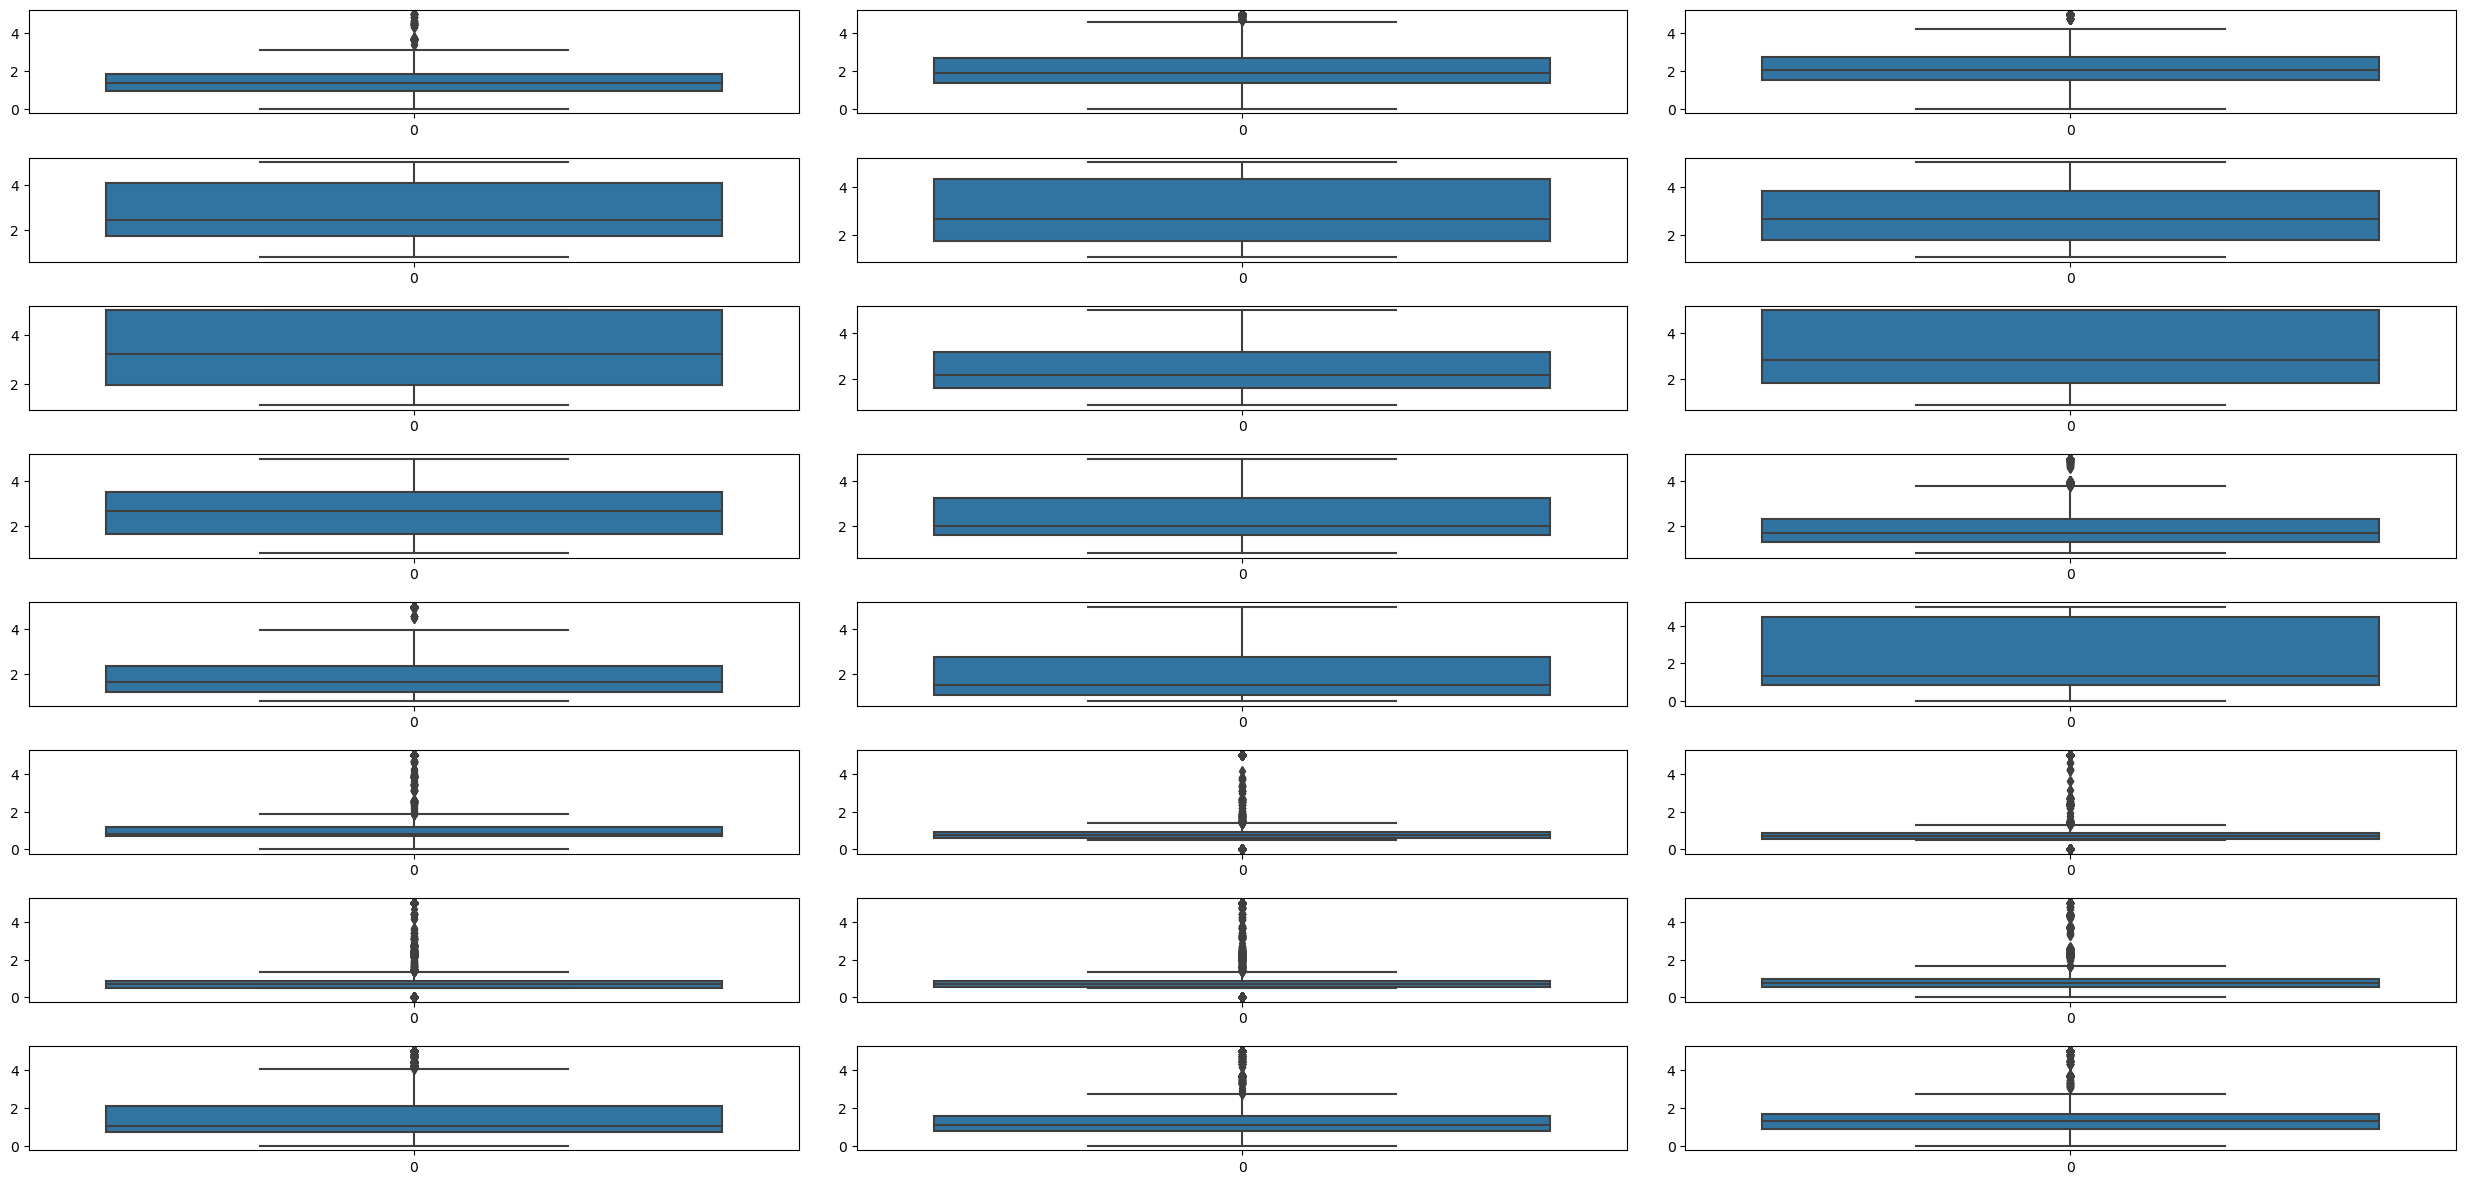

In [74]:
# PROMENI
fig, ax = plt.subplots(nrows = 8, ncols = 3, figsize=(25, 12))

plt.tight_layout()

for variable, subplot in zip(df.columns, ax.flatten()):
    
 
    sns.boxplot(data = df[variable], ax = subplot)

# display the plot
plt.show()

In [79]:
Q1 = df[['churches','resorts','beaches','burger/pizza shops','hotels/other lodgings','dance clubs','swimming pools','gyms','bakeries','beauty & spas','cafes','view points','monuments','gardens']].quantile(0.25)

Q3 = df[['churches','resorts','beaches','burger/pizza shops','hotels/other lodgings','dance clubs','swimming pools','gyms','bakeries','beauty & spas','cafes','view points','monuments','gardens']].quantile(0.75)

IQR = Q3-Q1

In [82]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

C:\Users\Nikola\AppData\Local\Temp\ipykernel_15004\843529426.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


(686, 24)

In [ ]:
# SKALIRANJE